In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython import display
import random
from sklearn.decomposition import PCA

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [4]:
# gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

In [5]:
# pus = tf.config.experimental.list_physical_devices(device_type='GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)  # 设置显存按需申请
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8192)]) 

In [6]:
seq_len = 30
num_singal = 29
seq_step = 1
value = 0
width = num_singal
height = seq_len
channels = 1
epoch_dura = 100
owner="D"
feature="29"
dp=2500

In [7]:
def pca(samples):
    X_n = samples
    ####################################
    ###################################
    # -- the best PC dimension is chosen pc=6 -- #
    n_components = num_singal
    pca = PCA(n_components)
    pca.fit(X_n)
    T_n = pca.transform(X_n)
    ex_var = pca.explained_variance_ratio_
    pc = pca.components_
    # projected values on the principal component
    T_n = np.matmul(X_n, pc.transpose(1, 0))
    samples = T_n
    return samples

In [8]:
def norm(train):
    m, n = train.shape  # m=562387, n=35
    # normalization
    for i in range(n):
        # print('i=', i)
        A = max(train[:, i])-min(train[:, i])
        if A != 0:
#             train[:,i] = train[:,i]-train[:,i].mean()
#             train[:,i] = train[:,i]/train[:,i].std()
            train[:,i] = (train[:,i]-train[:,i].min())/(train[:,i].max()-train[:,i].min())           
#             train[:,i] = train[:,i]*(train[:,i].max()-train[:,i].min())+train[:,i].min()
#             train[:, i] /= max(train[:, i])
#             # scale from -1 to 1
#             train[:, i] = 2 * train[:, i] - 1
        else:
            train[:, i] = train[:, i]
    return train

In [9]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
train_data=np.load('./data/dataD_29.npy',allow_pickle=True)
train_data1 = scaler.fit_transform(train_data)
# train_data1=norm(train_data)
train_data1 = pca(train_data1)
####################test data################################
test_data1=np.load('./data/dataA_29.npy',allow_pickle=True)
test_data1 = scaler.fit_transform(test_data1)
# test_data=norm(test_data)
test_data1 = pca(test_data1)
# test_data= test_data[test_data.shape[0]//2:,:]

test_data2=np.load('./data/dataB_29.npy',allow_pickle=True)
test_data2 = scaler.fit_transform(test_data2)
# test_data=norm(test_data)
test_data2 = pca(test_data2)
# test_data= test_data[test_data.shape[0]//2:,:]

test_data3=np.load('./data/dataC_29.npy',allow_pickle=True)
test_data3 = scaler.fit_transform(test_data3)
# test_data=norm(test_data)
test_data3 = pca(test_data3)
# test_data= test_data[test_data.shape[0]//2:,:]

test_data = np.vstack((test_data1,test_data2))
test_data = np.vstack((test_data,test_data3))
#############################################################

train_data_driver = train_data1[:train_data.shape[0]//2,:] #6621
# train_data_driver=norm(train_data_driver)
# train_data_driver = pca(train_data_driver)

train_data_drivertest = train_data1[train_data.shape[0]//2:,:] 
# train_data_drivertest=norm(train_data_drivertest)
# train_data_drivertest = pca(train_data_drivertest)

In [10]:
def driver(seq_len, seq_step, num_singal,value):
    ##########################################################
#     train=np.load('./data/dataD.npy',allow_pickle=True)
    train = train_data_driver
    ##########################################################
#     train = norm(train)
#     train = pca(train)
    
    labels = np.full(shape=(len(train)),fill_value=value)
    samples = train

    num_samples = (samples.shape[0] - seq_len) // seq_step
    aa = np.empty([num_samples, seq_len, num_singal])
    bb = np.empty([num_samples, seq_len, 1])


    for j in range(num_samples):
        bb[j, :, :] = np.reshape(labels[(j * seq_step):(j * seq_step + seq_len)], [-1, 1])
        for i in range(num_singal):
            aa[j, :, i] = samples[(j * seq_step):(j * seq_step + seq_len), i]
#         for k in range(num_singal):
#             A = max(aa[j, :, k])-min(aa[j, :, k])
#             if A != 0:
#                 aa[j, :, k] = (aa[j, :, k]-aa[j, :, k].min())/(aa[j, :, k].max()-aa[j, :, k].min())
#             else:
#                 aa[j, :, k] = aa[j, :, k]    

    samples = aa
#     index = [i for i in range(len(samples))]
#     random.shuffle(index)
#     samples = samples[index]
#     samples = samples[0:dp]
    labels = bb

    return samples, labels

In [11]:
dataD_train,labelD = driver(seq_len, seq_step, num_singal,value)

In [12]:
dataD_train.shape

(6591, 30, 29)

In [13]:
def driver_test():    
#     dataD=np.load('./data/dataD.npy',allow_pickle=True)
    dataD=train_data_drivertest#train_data_drivertest[:6622,]
#     dataB=np.load('./data/dataB.npy',allow_pickle=True)
#     dataH=np.load('./data/dataH.npy',allow_pickle=True)
    dataA=test_data#train_data_drivertest[6622:,]
#     dataH = dataH[2000:,:]
#     dataB=dataB[:3000,:]
#     dataA=np.vstack((dataA,dataB))
#     dataA=np.vstack((dataA,dataH))
#     dataA = dataA[1000:,:]
    dataD_normal = dataD
    dataD_anormaly=dataA
    
#     dataD_contrib = np.vstack((dataD_normal,dataD_anormaly))
#     dataD_contrib = norm(dataD_contrib)
#     dataD_contrib = pca(dataD_contrib)
    label_0 = np.full(shape=(len(dataD_normal)),fill_value=0)
    label_1 = np.full(shape=(len(dataD_anormaly)),fill_value=1)
#     idx = np.asarray(list(range(0, dataD_contrib.shape[0])))
    
#     dataD_normal = dataD_contrib[:dataD_normal.shape[0],:]
#     dataD_anormaly = dataD_contrib[dataD_normal.shape[0]:,:]

    num_samples_0 = (dataD_normal.shape[0] - seq_len) // 1
    aa_0 = np.empty([num_samples_0, seq_len, num_singal])
    bb_0 = np.empty([num_samples_0, seq_len, 1])
    bbb_0 = np.empty([num_samples_0, seq_len, 1])
    for j in range(num_samples_0):
        bb_0[j, :, :] = np.reshape(label_0[(j * 1):(j * 1 + seq_len)], [-1, 1])
        for i in range(num_singal):
            aa_0[j, :, i] = dataD_normal[(j * 1):(j * 1 + seq_len), i]
#         for k in range(num_singal):
#             A = max(aa_0[j, :, k])-min(aa_0[j, :, k])
#             if A != 0:
#                 aa_0[j, :, k] = (aa_0[j, :, k]-aa_0[j, :, k].min())/(aa_0[j, :, k].max()-aa_0[j, :, k].min())
#             else:
#                 aa_0[j, :, k] = aa_0[j, :, k]

    num_samples_1 = (dataD_anormaly.shape[0] - seq_len) // 1
    aa_1 = np.empty([num_samples_1, seq_len, num_singal])
    bb_1 = np.empty([num_samples_1, seq_len, 1])
    bbb_1 = np.empty([num_samples_1, seq_len, 1])
    for j in range(num_samples_1):
        bb_1[j, :, :] = np.reshape(label_1[(j * 1):(j * 1 + seq_len)], [-1, 1])
        for i in range(num_singal):
            aa_1[j, :, i] = dataD_anormaly[(j * 1):(j * 1 + seq_len), i]
#         for k in range(num_singal):
#             A = max(aa_1[j, :, k])-min(aa_1[j, :, k])
#             if A != 0:
#                 aa_1[j, :, k] = (aa_1[j, :, k]-aa_1[j, :, k].min())/(aa_1[j, :, k].max()-aa_1[j, :, k].min())
#             else:
#                 aa_1[j, :, k] = aa_1[j, :, k]

        
        
#     aa_1_A = aa_1[:len(aa_1)//2,:]
#     aa_1_B = aa_1[len(aa_1)//2:,:]
#     bb_1_A = bb_1[:len(aa_1)//2,:]
#     bb_1_B = bb_1[len(aa_1)//2:,:]
#     dataD_test = np.insert(aa_0,1500,aa_1,axis=0)
#     dataD_test = np.insert(dataD_test,5880,aa_1_B,axis=0)
#     labelD_test = np.insert(bb_0,1500,bb_1,axis=0)
#     labelD_test = np.insert(labelD_test,5880,bb_1_B,axis=0)
    dataD_test = np.concatenate((aa_0,aa_1),axis=0)
    labelD_test= np.concatenate((bb_0,bb_1),axis=0)
    labelD_test = np.reshape(labelD_test,[labelD_test.shape[0],labelD_test.shape[1]])
    labelD_test = np.sum(labelD_test,1)
    labelD_test[labelD_test > 1] = 1

    index = [i for i in range(len(dataD_test))]
    random.shuffle(index)
    dataD_test = dataD_test[index]
    labelD_test = labelD_test[index]
    np.save("./GRUGAN_score/label_owner"+owner+".npy", labelD_test)

#     dataD_test = np.reshape(dataD_test,[dataD_test.shape[0],dataD_test.shape[1],dataD_test.shape[2],1])
    return dataD_test,labelD_test

In [14]:
dataD_test,labelD_test = driver_test()

In [15]:
dataD_test.shape

(34185, 30, 29)

In [16]:
def make_generator_model():
  model = tf.keras.Sequential()
#   model.add(layers.GRU(64, input_length=height, input_dim=width, return_sequences=True))
#   model.add(layers.Dropout(0.3))
  model.add(layers.GRU(32, input_length=height, input_dim=width, return_sequences=True))
#   model.add(layers.Dropout(0.3))
  model.add(layers.GRU(16, input_length=height, input_dim=width, return_sequences=True))
#   model.add(layers.Dropout(0.3))
  model.add(layers.TimeDistributed(layers.Dense(width)))
  return model

In [17]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 32)            6048      
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 16)            2400      
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 29)            493       
Total params: 8,941
Trainable params: 8,941
Non-trainable params: 0
_________________________________________________________________


In [18]:
noise = tf.random.normal([dataD_train.shape[0],30,29])
generated_image = generator(noise, training=False)

In [19]:
generated_image_a = np.reshape(generated_image[1],[30,29])

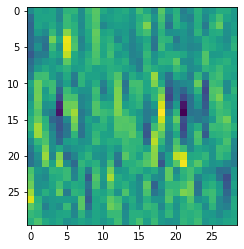

In [20]:
plt.imshow(generated_image_a[ :, :])

In [21]:
generated_image.shape

TensorShape([6591, 30, 29])

In [22]:
def make_discriminator_model():
    model = tf.keras.Sequential()
#     model.add(layers.GRU(64, input_length=height, input_dim=width, return_sequences=True))
#     model.add(layers.Dropout(0.3))
    model.add(layers.GRU(32, input_length=height, input_dim=width, return_sequences=True))
#     model.add(layers.Dropout(0.3))
    model.add(layers.GRU(16, input_length=height, input_dim=width, return_sequences=False))
#     model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    return model

In [23]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30, 32)            6048      
_________________________________________________________________
gru_3 (GRU)                  (None, 16)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 8,465
Trainable params: 8,465
Non-trainable params: 0
_________________________________________________________________


In [24]:
decision = discriminator(generated_image)
print (decision)

tf.Tensor(
[[ 0.11747368]
 [-0.08990221]
 [ 0.00858683]
 ...
 [-0.05687672]
 [-0.12828492]
 [ 0.09710395]], shape=(6591, 1), dtype=float32)


In [25]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [26]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [27]:
def generator_loss(fake_output):
    generator_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    return generator_loss

In [28]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [29]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [30]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16 # For visualization

# We will reuse this noise_vector overtime (so it's easier)
# to visualize progress in the animated GIF)
noise_vector = tf.random.normal([dataD_train.shape[0],height, width])

In [31]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(16):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :])
      plt.axis('off')

  plt.savefig('./GRU_picture/image_at_'+str(epoch)+'_'+owner+'.png')
  plt.show()

In [32]:
def evaluate():    
    score = np.empty([labelD_test.shape[0]])
    for i in range(len(dataD_test)):
        a=0
        test = np.reshape(dataD_test[i],[1,dataD_test[i].shape[0],dataD_test[i].shape[1]])
        d=discriminator(test)
        if float(d) > 0:
            a=0
        else:
            a=1
        score[i]=a
    return score

In [33]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE,height, width])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      # Generator output
        generated_images = generator(noise, training=True)
      
      # Discriminator output
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True) 
      
      # Loss functions
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
  
    # Gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Update both networks
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss,disc_loss

In [34]:
def train(dataset, epochs):
      score1 = np.empty([labelD_test.shape[0]])
      gen_loss =np.empty([EPOCHS])
      disc_loss =np.empty([EPOCHS])
    
      for epoch in range(epochs):
        start = time.time()
        if epoch%5 ==0:
            score = evaluate()
            score1 = np.vstack((score1,score))

        for image_batch in dataset:
            gen_loss[epoch],disc_loss[epoch]=train_step(image_batch)


        # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                                 epoch + 1,
                                 noise_vector)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

      # Generate after the final epoch
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                               epochs,
                               noise_vector)
      np.save("./GRUGAN_score/score_owner"+owner+".npy", score1)
      np.save("./GRUGAN_loss/gloss_owner"+owner+".npy", gen_loss)
      np.save("./GRUGAN_loss/dloss_owner"+owner+".npy", disc_loss)

In [35]:
# BUFFER_SIZE = 60000
BATCH_SIZE = 64
dataD_train=dataD_train.astype('float32')
train_dataset = tf.data.Dataset.from_tensor_slices(dataD_train).shuffle(dataD_train.shape[0]).batch(BATCH_SIZE)

In [36]:
dataD_train.shape

(6591, 30, 29)

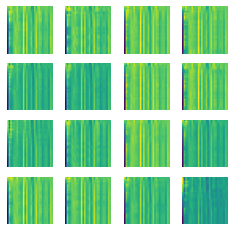

Wall time: 1h 33min 52s


In [37]:
%%time
train(train_dataset, EPOCHS)

In [38]:
score1=np.load('./GRUGAN_score/score_owner'+owner+'.npy',allow_pickle=True)
labelD_test=np.load('./GRUGAN_score/label_owner'+owner+'.npy',allow_pickle=True)
gen_loss=np.load('./GRUGAN_loss/gloss_owner'+owner+'.npy', allow_pickle=True)
disc_loss=np.load('./GRUGAN_loss/dloss_owner'+owner+'.npy', allow_pickle=True)

In [39]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
precision = np.empty([score1.shape[0]-1])
recall = np.empty([score1.shape[0]-1])
f1 = np.empty([score1.shape[0]-1])
acc = np.empty([score1.shape[0]-1])
for i in range (score1.shape[0]-1):
    precision[i], recall[i], f1[i], _ = precision_recall_fscore_support(labelD_test, score1[i+1], average='binary')
    acc[i] = accuracy_score(labelD_test, score1[i+1])

In [40]:
acc

array([0.40432938, 0.79046365, 0.52514261, 0.75781776, 0.58519819,
       0.84028082, 0.79479304, 0.96615475, 0.89053679, 0.83627322,
       0.92704403, 0.7966652 , 0.8129589 , 0.43627322, 0.7763639 ,
       0.68775779, 0.54389352, 0.56826093, 0.65139681, 0.84300132])

In [41]:
np.mean(precision[10:])

0.8778278209072227

In [42]:
precision[19]

0.9229012862470508

In [43]:
np.mean(recall[10:])

0.7355235023375494

In [44]:
recall[19]

0.8789185663030479

In [45]:
np.mean(f1[10:])

0.7957652620850411

In [46]:
f1[19]

0.9003731135490338

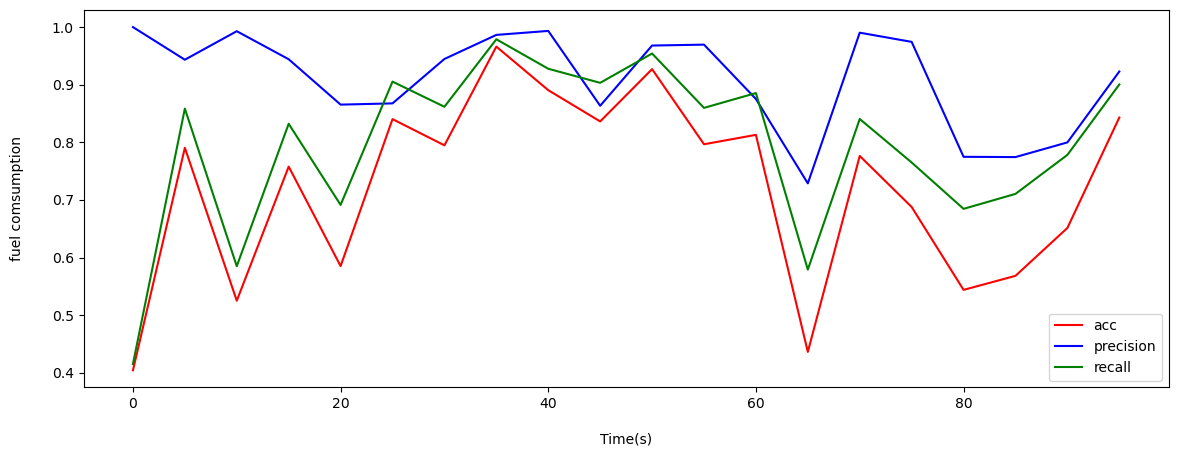

In [47]:
arrange=np.arange(0, 100, 5, dtype=np.int32)
plt.figure(figsize=(14,5),dpi=100,linewidth = 4)
plt.plot(arrange,acc,'b', c='red',label = "acc")
plt.plot(arrange,precision,'b', c='blue',label = "precision")
plt.plot(arrange,f1,'b', c='green',label = "recall")
plt.xlabel("Time(s)", fontsize=10, labelpad = 15)
plt.ylabel("fuel comsumption", fontsize=10, labelpad = 20)
plt.legend(loc = "best", fontsize=10)
# plt.savefig("./picture/driverA&D_fuel comsumption.png")

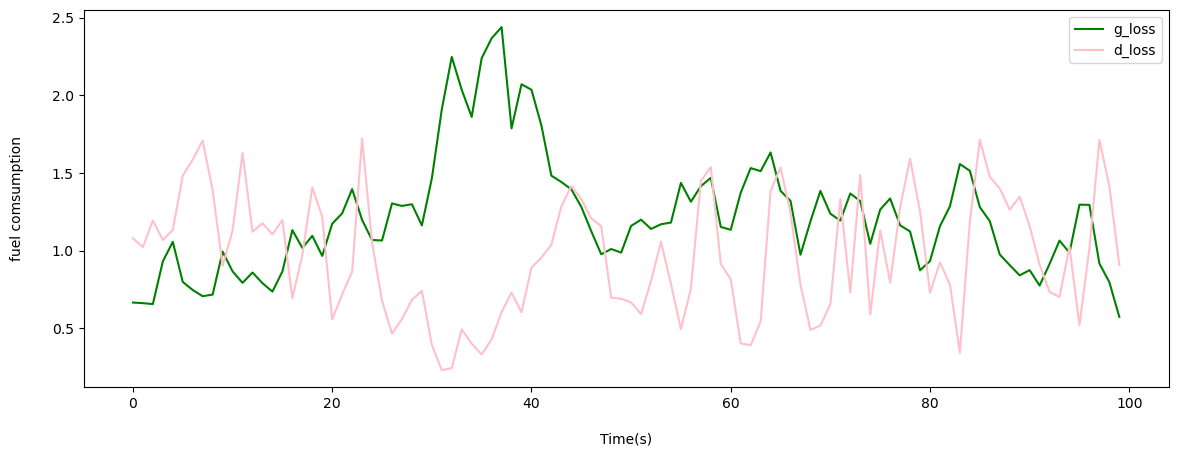

In [48]:
arrange1=np.arange(0, 100, 1, dtype=np.int32)
plt.figure(figsize=(14,5),dpi=100,linewidth = 4)
plt.plot(arrange1,gen_loss,'b', c='green',label = "g_loss")
plt.plot(arrange1,disc_loss, 'b',c='pink',label = "d_loss")
plt.xlabel("Time(s)", fontsize=10, labelpad = 15)
plt.ylabel("fuel comsumption", fontsize=10, labelpad = 20)
plt.legend(loc = "best", fontsize=10)